# Introductory applied machine learning (INFR10069)

# Assignment 1: Data analysis and visualisation

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "01_Analysis.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="01_Analysis.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "01_Analysis.ipynb"
```

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [3]:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

sys.path.append('..')
from utils.plotter import scatter_jitter, plot_confusion_matrix

/Users/thomascartwright/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. The class is conveniently stored in the `class` column. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the some words out of 61,000 that had highest mutual information. For very sophisticated technical reasons (which you should know!) 1 was added to all the word counts in part 1. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

**Hint**: The data was preprocessed by a very busy PhD student... and hence should never be taken to be perfect at face value!

## 1. Exploration of the dataset

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 --- [10 marks] ==========

1. [Code] Load the dataset `raw_20news.csv` into a data-frame called `news_raw`. Using pandas methods we learnt in class, extract some basic information about the data. 

1. [Text] In a short paragraph, summarise the key features of the dataset. *Hint: Look at what we did in the labs.*

In [4]:
# (1)
# Load the dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'raw_20news.csv')
news_raw = pd.read_csv(data_path, delimiter = ',')
# Extract information from the data
print(news_raw.shape)
news_raw.describe()

(2129, 521)


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.00000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,5.128229,6.097698,6.120244,5.551902,5.521841,6.12776,5.633161,6.090653,5.970409,5.624706,...,9.666510,9.217473,9.061531,9.398309,9.175200,9.708783,8.807891,9.719587,9.307656,3.092532
std,38.292577,46.190953,46.656022,40.953913,40.978098,45.96434,41.146918,45.762060,44.266628,40.769105,...,45.844064,43.948910,40.969185,43.833064,42.403283,47.294120,39.341038,46.185082,45.059367,1.395948
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.00000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


In [5]:
# Note: I added this cell myself
# Find the longest and shortest article
document_lengths = news_raw.sum(0)
print(np.min(document_lengths))
print(np.max(document_lengths))

6584
21095


In [11]:
# TODO: inspect the class column to take a look at the splits (e.g. what is in what class and how many of them are there)
classes = news_raw['class'].value_counts()
classes

4    454
5    453
3    427
2    427
1    368
Name: class, dtype: int64

(2) We can see we have 521 attributes and 2129 documents in our dataset. The standard deviation is high compared to the mean. Our percentiles show that the vast majority of documents (roughly 75%) contain very few (if any) of the words. We can also see by inspecting the lengths of the some of the documents (by evalutating the number of attributes they contain) that some documents appear to be much longer than other. We can also see that the distribution of classes is similar.

### ========== Question 1.2 ---  [6 marks] ==========
1. [Code] Display the names of some of the attributes in the training datset. 
1. [Text] Describe the output and comment (1 or 2 sentences) keeping in mind the selection procedure for the features.

In [12]:
# (1) 
# Load the training dataset
# TODO: check i am loading in the correct dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'train_20news.csv')
news_train = pd.read_csv(data_path, delimiter = ',')

# Import the random library and set our random seed to 1
import random
random.seed(1)

# Randomly select 20 attribute names from the training dataset
random.sample(list(news_train.columns.values), 20)

# TODO: Remove the 'wX_' from the beginning of attribute names to make more readable

['w138_pin',
 'w65_hitters',
 'w262_existence',
 'w121_duo',
 'w508_extremely',
 'w461_wings',
 'w484_teams',
 'w389_christian',
 'w215_nature',
 'w97_series',
 'w500_team',
 'w30_faith',
 'w400_being',
 'w444_devils',
 'w3_kmr',
 'w457_toronto',
 'w273_tek',
 'w235_finals',
 'w105_wwc',
 'w326_potvin']

(2) 
The attribute names we see here are are 20 randomly selected column headers from our pandas dataframe. We can see that the majority of the words in this list could be seen to be specific to 1 of the 5 classes. This makes sense since during preprocessing, words with the highest mutual information were chosen - we would therefore expect the majority of words in the set to have a clear association with one of the classes.

### ========== Question 1.3 --- [4 marks] ==========
Familiarise yourself with the [`stripplot`](https://seaborn.github.io/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) function in `seaborn`. 

1. [Code] Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for dataset **A**. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise. 

1. [Text] Mention anything peculiar you observe in the Data.

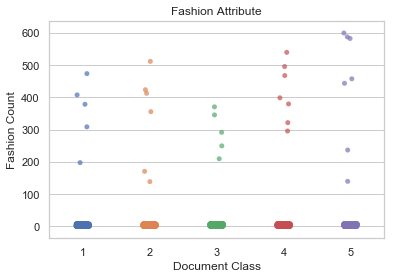

In [72]:
# (1) # Your Code goes here:
# Plot the "fashion" attribute
sns.set(style="whitegrid")
ax = sns.stripplot(y='w519_fashion', x='class', data=news_raw, jitter=True, alpha=0.7)
plt.title("Fashion Attribute")
plt.xlabel('Document Class')
plt.ylabel('Fashion Count')
plt.show()

(2) 
The majority of the documents have very few mentions of the word and then there are some outliers (very small subset of the documents) that have hundreds of occurences of the words. This suggests that there are some outliers in our data.


### ========== Question 1.4  --- [8 marks] ==========
Let us analyse this further. The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of jitter into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. For this, you will be using the function `scatter_jitter` from the `utils` library which we provided. This function takes as input two numpy arrays containing the features of interest. 

1. [Code] First, pick two attributes of your choice from dataset A and use the provided function to plot their joint distribution. Do this twice (i.e. pick 4 attributes and do plots between two pairs: you do not need to plot between each possible pair). You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2. Label the axes appropriately.

1. [Text] Do these plots increase or reduce the possibility of the data-set containing outliers? Why or why not? How would you visualise the data to verify this? **N.B. There is no need to code anything for this part, just indicate a reasonable type of plot, and what you expect to see.**

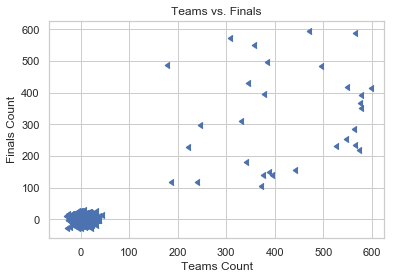

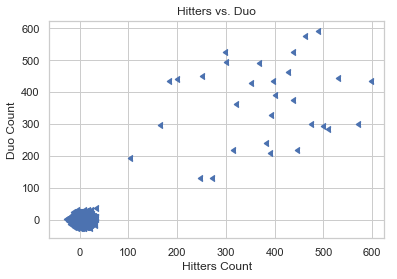

In [70]:
# (1)
# Extract two attributes and plot them on a scatter plot
teams = np.array(news_raw['w484_teams'])
finals = np.array(news_raw['w235_finals'])
_ = scatter_jitter(teams, finals, jitter=0.2)
plt.title("Teams vs. Finals")
plt.xlabel('Teams Count')
plt.ylabel('Finals Count')
plt.show()

# Extract two different attributes and plot them on a scatter plot
hitters = np.array(news_raw['w65_hitters'])
duo = np.array(news_raw['w121_duo'])
_ = scatter_jitter(hitters, duo, jitter=0.2)
plt.title("Hitters vs. Duo")
plt.xlabel('Hitters Count')
plt.ylabel('Duo Count')
plt.show()

(2) 
These plots increase the likelihood of outliers. As we can see that the majority of points are contained in the "blob" of points close to 0. However, there are a small number of points scattered higher on the scale, showing documents that contain hundreds of occurences of the words. We can also see that it appears to be the same documents that contain hundreds of occurences of each word i.e. the documents contain hundreds of occurends of both words. This highly suggests that these documents are outliers.

To visualise this I would create a histogram plot that would show the distribution of the points, hopefully highlighting that documents containing hundreds of occurences of each word are the vast minority of the overall dataset of documents.

### ========== Question 1.5 --- [15 marks] ==========
We want to get rid of the potential outliers in the data. Your job now is to create a new dataset from `news_raw` (name it `news_clean`) and remove the outliers.

1. [Text] Decide on a criterion to find the outliers and argue why it is reasonable. 
1. [Code] Then implement it and visualise the result (in terms of your criterion). **Be careful** not to alter the original dataset as we will need it later. 
1. [Text] Finally report the number of points in the cleaned dataset, and the number rejected as outliers and comment on the result

(1)
From our description of the data in q1.1 we can see that the standard deviation is quite high and so a suitable criterion for outliers would be any document that contains a count of words more than 2 standard deviations above the mean count for that word.

In [52]:
# (2)
# Get the standard deviation for each column in the dataframe
news_raw_std = news_raw.std(axis=0)
# Get the mean of each column in the dataframe
news_raw_mean = news_raw.mean(axis=0)
# Find all rows in the dataframe that have at least one attribute breaching the limit of count > column_mean + 2*column_std
outliers_idx = (news_raw > (news_raw_mean + 2*news_raw_std)).any(axis=1)
# Remove the outliers
news_clean = news_raw[~outliers_idx]
news_clean.shape

(2091, 521)

(3)
- The clean dataset has 2091 pooints. The raw dataset had 2129 and so 38 points were removed as outliers.
- This shows us that the number of outliers was around ~1.5% of the raw dataset. This fits with our observations from the scatter plots and reassures us that we have not cut out valid documents.

# ========== Question 1.6 --- (LEVEL 11) --- [10 marks] ==========

1. [Code] Visualise some of the outlier documents and some of the inlier ones. 
1. [Text] Comment on the observations. Also comment on whether it is appropriate to do such cleaning on just the training data or on the entire data-set (including testing).

In [53]:
# (1)
news_raw[outliers_idx].head()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
123,106,583,395,336,309,505,238,361,140,469,...,329,213,296,305,331,541,398,444,200,5
159,211,561,565,277,181,418,165,216,528,331,...,536,540,177,216,526,218,459,356,284,2
196,207,115,166,455,365,436,305,536,232,274,...,248,318,235,335,377,231,225,458,251,5
222,428,227,245,463,426,468,164,510,315,154,...,161,240,203,163,436,410,289,380,576,4
242,318,543,379,543,286,207,305,475,458,123,...,180,203,263,227,429,123,339,309,417,1


In [57]:
# TODO: maybe add a histogram to show a random number of attributes and their counts
# TODO: maybe add a describe method too
# sns.distplot(news_raw[outliers_idx][:10])

In [58]:
news_clean.head()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3


(2) 
It appears as if every attribute for the outliers is an outlier. I.e. almost every attribute is greater than 100 and so these documents presumably contain a massive amount of words in general.

TODO: check answer below about cleaning the test set.

I believe we should clean the test set in the same way we have cleaned the training set


## 2. Naive Bayes classification
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/0.19/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 --- [6 marks] ==========

Load the cleaned datasets `train_20news.csv` and `test_20news.csv` into pandas dataframes `news_train` and `news_test` respectively. Using pandas summary methods, confirm that the data is similar in both sets.

In [59]:
# Load train and test data into pandas dataframes 
train_data_path = os.path.join(os.getcwd(), 'datasets', 'train_20news.csv')
news_train = pd.read_csv(train_data_path, delimiter = ',')
test_data_path = os.path.join(os.getcwd(), 'datasets', 'test_20news.csv')
news_test = pd.read_csv(test_data_path, delimiter = ',')

In [60]:
news_train.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,...,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000
mean,1.025727,1.017627,1.014769,1.008576,1.006193,1.010481,1.026203,1.024297,1.012387,1.084326,...,4.574083,4.464983,4.533111,4.557885,4.531682,4.514531,4.509290,4.521201,4.412577,3.091472
std,0.280109,0.205208,0.172657,0.115206,0.078473,0.134174,0.618880,0.274219,0.153879,0.491139,...,2.283028,2.273922,2.329654,2.292246,2.333558,2.259005,2.287548,2.295995,2.296504,1.395628
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,7.000000,6.000000,7.000000,6.500000,6.000000,4.000000
max,8.000000,7.000000,5.000000,4.000000,2.000000,4.000000,28.000000,5.000000,4.000000,16.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,5.000000


In [61]:
news_test.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,128.000000,128.000000,128.0,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.00000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.007812,1.031250,1.0,1.0,1.007812,1.015625,1.007812,1.039062,1.015625,1.085938,...,4.757812,4.351562,4.593750,4.445312,4.53125,4.453125,4.687500,4.421875,4.531250,3.078125
std,0.088388,0.278847,0.0,0.0,0.088388,0.124507,0.088388,0.291678,0.124507,0.281373,...,2.201453,2.175706,2.438011,2.387001,2.31373,2.383868,2.390104,2.285212,2.370878,1.400840
min,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,2.000000,2.000000,2.75000,2.000000,2.750000,2.000000,2.000000,2.000000
50%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,4.000000,4.00000,5.000000,5.000000,4.000000,5.000000,3.000000
75%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,6.25000,7.000000,7.000000,6.000000,7.000000,4.000000
max,2.000000,4.000000,1.0,1.0,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,...,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,5.000000


In [63]:
train_classes = news_train['class'].value_counts()
train_classes

4    447
5    446
3    422
2    421
1    363
Name: class, dtype: int64

In [64]:
test_classes = news_test['class'].value_counts()
test_classes

2    32
5    28
4    26
3    22
1    20
Name: class, dtype: int64

In [ ]:
# TODO: Remove the below code eventually because it doesn't help
# mean_test = np.array(news_test.describe().loc['mean'])
# mean_train = np.array(news_train.describe().loc['mean'])
# np.isclose(mean_test, mean_train)

As we can see from the above dataframes that the sets are very similar. The means and standard deviations are very similar and the distribution of classes appears to be reasonable.

### ========== Question 2.2 --- [4 marks] ==========

[Text] Answer (in brief) the following two questions:
1. What is the assumption behing the Naive Bayes Model?
1. What would be the main issue we would have to face if we didn't make this assumption?

(1)
The assumption behind the Naive Bayes model is that all the features are conditionally independent of each other given the class.
    
(2)
A standard Bayes model requires lots of observations in order to estimate the conditional. So if the number of attributes is large, then computing the probabilities to in order to construct the model becomes very computationally expensive.

### TODO: insert some equations from and information from the Naive Bayes slides in lectures

### ========== Question 2.3 --- [8 marks] ==========

1. [Code] By using the `scatter_jitter` function, display a scatter plot of the features `w281_ico` and `w273_tek` for the **cleaned** dataset A. Set the jitter value to an appropriate value for visualisation. Label axes appropriately.
1. [Text] What do you observe about these two features? Does this impact the validity of the Naive Bayes assumption? Why or why not?

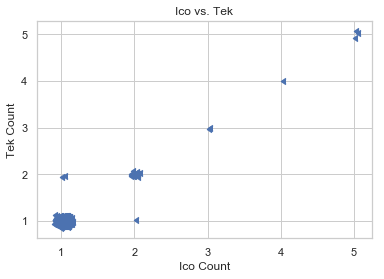

In [73]:
# (1) # Your Code goes here:
ico = np.array(news_clean['w281_ico'])
tek = np.array(news_clean['w273_tek'])
jitter_data = scatter_jitter(ico, tek, jitter=0.2)
plt.title("Ico vs. Tek")
plt.xlabel('Ico Count')
plt.ylabel('Tek Count')
plt.show()

(2) The relationship between these two attributes appears to be linear and so the two features are probably not independent. This does affect the validity of the Naive Bayes assumptions since this contradicts the belief that all attributes are conditionally independent given the class.

TODO: This does/does not impact the validity of the naive bayes assumption because ... SHOULD WE SPLIT THIS INTO CLASSES AND CHECK THEN BECAUSE THAT MIGHT REVEAL THAT CONDITIONALLY ON CLASSES THEY ARE NOT INDEPENDENT

### ========== Question 2.4 --- [7 marks] ==========
1. [Text] What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of?*. 
1. [Code] Estimate the baseline performance on the *training* data in terms of classification accuracy.

(1) A reasonable baseline which to compare our classifications performance is, the simplest classifier, majority class. This is where the model predicts the majority class everytime.

In [104]:
# (2)
def baseline(documents):
    return news_clean['class'].value_counts().idxmax()
news_clean['class'].value_counts()

4    447
5    444
3    422
2    419
1    359
Name: class, dtype: int64

We can see that the most comman class is 4. And so if we were to classify all documents as class 4 we would achieve an accuracy of,

In [91]:
classification_accuracy = news_clean['class'].value_counts().iloc[0] / np.sum(news_clean['class'].value_counts())
classification_accuracy

0.21377331420373027

<a id='question_2_5'></a>
### ========== Question 2.5 --- [12 marks] ==========

1. [Code] Fit a Gaussian Naive Bayes model to the cleaned dataset. 

1. [Code] Report the classification accuracy on the **training** dataset and plot a Confusion Matrix for the result (labelling the axes appropriately).

1. [Text] Comment on the performance of the model. Is the accuracy a reasonable metric to use for this dataset?

*Hint: You may make use of utility functions we provided, as well as an sklearn method for computing confusion matrices*

In [93]:
# (1)
features = news_clean.drop(columns=['class'])
classes = news_clean['class']
clf = GaussianNB()
clf.fit(features, classes)

GaussianNB(priors=None)

The Gaussian Naive Bayes Model Acheived a classification accuracy of: 0.8894711767508338


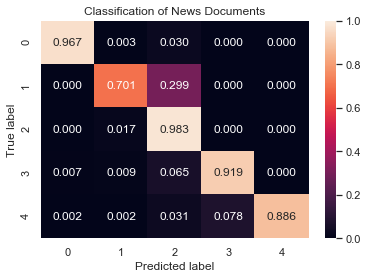

In [99]:
# (2)

# Calculate the predictions from the model
class_pred = clf.predict(np.array(news_train.drop(columns=['class'])))
# Calculate the classification score of the GNB model
score = accuracy_score(news_train['class'], class_pred)

print("The Gaussian Naive Bayes Model Acheived a classification accuracy of: " + str(score))


# Calculate the confusion matrix
cm = confusion_matrix(np.array(news_train['class']), clf_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix as a heatmap
plt.figure()
plot_confusion_matrix(cm_norm, classes=['0', '1', '2', '3', '4'])
plt.title("Classification of News Documents")
plt.show()

(3)
- The model performs very well on this task achieving a high classification accuracy.
- I believe classification accuracy is a reasonable metric to use for this dataset since the classes are reasonably balanced.

### ========== Question 2.6 --- [3 marks] ==========

[Text] Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

- The confusion matrix shows us, firstly, that the model is achieving a good classification accuracy on most of the classes. 
- The only issue appears to be that ~30% of the time it will wrongly classify class 1 as class 2. This is probably due to the fact that the two classes are similar (comp.sys.ibm.pc.hardware and comp.sys.mac.hardware) and so is expected. 
- The only confusion is why the model is not also wrongly classifying class 2 as class 1 as well.

### ========== Question 2.7 --- [12 marks] ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). 

1. [Code] Use the classifier you trained in Question [2.5](#question_2_5) (i.e. on the cleaned dataset) and test its performance on the test dataset. Display classification accuracy and plot a confusion matrix of the performance on the test data. 

1. [Code] Also, reevaluate the performance of the baseline on the test data.

1. [Text] In a short paragraph (3-4 sentences) compare and comment on the results with the training data/baseline.

The Gaussian Naive Bayes Model Acheived a classification accuracy of: 0.8359375


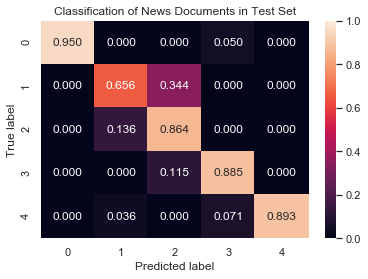

In [101]:
# Evaluate the score the model on the test class

# Calculate the predictions of the model on the test set
test_pred = clf.predict(np.array(news_test.drop(columns=['class'])))
# Calculate the classification score of the GNB model
score_test = accuracy_score(news_test['class'], test_pred)

print("The Gaussian Naive Bayes Model Acheived a classification accuracy of: " + str(score_test))

# Calculate the confusion matrix
cm = confusion_matrix(np.array(news_test['class']), test_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix as a heatmap
plt.figure()
plot_confusion_matrix(cm_norm, classes=['0', '1', '2', '3', '4'])
plt.title("Classification of News Documents in Test Set")
plt.show()

In [113]:
# Calculate the predictions of the baseline on the test set
baseline_pred = news_test.apply(baseline, axis=1)
# Calculate the classification score of the GNB model
score_baseline = accuracy_score(news_test['class'], baseline_pred)

# TODO: draw a confusion matrix for the baseline

print("The Baseline acheived a classification accuracy of: " + str(score_baseline))

The Baseline acheived a classification accuracy of: 0.203125


(3)
- We can see that the model performed better on the training data than it did with the test data, though the classification accuracy on the test set is still good which suggests our model may generalise well.
- The confusion matrices also show similar confusion between the training and the test set though the model on the test set did become more confused between the two similar classes (1 and 2). 
- We can also see that our baseline performed equally as bad on the test set as it did on the training set.

### ========== Question 2.8 --- (LEVEL 11) --- [7 marks] ==========
1. [Code] Fit a Gaussian Naive Bayes model to the original raw dataset (including the outliers) and test its performance on the **test** set. 

1. [Text] Comment on the output and explain why or why not cleaning affects the classifier.

The Gaussian Naive Bayes Model Acheived a classification accuracy of: 0.171875


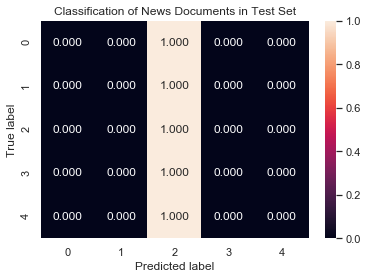

In [115]:
# (1)
features = np.array(news_raw.drop(columns=['class']))
classes = np.array(news_raw['class'])
raw_gnb = GaussianNB()
raw_gnb.fit(features, classes)

# Calculate the predictions of the model on the test set
raw_pred = raw_gnb.predict(np.array(news_test.drop(columns=['class'])))
# Calculate the classification score of the GNB model
score_raw = accuracy_score(news_test['class'], raw_pred)

print("The Gaussian Naive Bayes Model Acheived a classification accuracy of: " + str(score_raw))

# Calculate the confusion matrix
cm = confusion_matrix(np.array(news_test['class']), raw_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix as a heatmap
plt.figure()
plot_confusion_matrix(cm_norm, classes=['0', '1', '2', '3', '4'])
plt.title("Classification of News Documents in Test Set")
plt.show()

(2) 
- Training on the raw data actually performs worse than the baseline created above. 
- It appears to be classifying everything as class 2.
- Cleaning affects the classifier because as we can see in our cleaning process we removed several extreme outliers.

### ========== Question 2.9 --- (LEVEL 11) --- [3 marks] ==========

In this exercise we have fitted a Gaussian Naive Bayes classifier to the data (i.e. the class conditional densities are Gaussians). However, this is not ideally suited to our dataset. Can you explain why this is so? what kind of Naive Bayes model would you employ to this kind of data?

***Your answer goes here:***